In [1]:
!pip install pyspark
import random
import pandas as pd

LINHA = 10
COLUNA = 20

print("Matriz Binária:")
table = []
for i in range(LINHA):
    row = [random.randint(0,1) for j in range(COLUNA)]
    table.append(row)

pd.DataFrame(table)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=097b0e8e1337380521a14bfa2c17cf755948929f4020e30e3baba58e771ab62d
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Matriz Binária:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1
1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0
2,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1
3,0,0,0,1,1,1,0,1,1,1,0,0,1,0,1,0,0,1,0,1
4,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
5,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,1
6,0,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0
7,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0
8,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0
9,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [2]:
import numpy as np

def jaccard_similarity(row1, row2,COLUNA):
    print(f"Calculo da quantidade de numeros iguais das linhas {row1} e {row2}")
    print("Numeros 1:")
    set1 = {i for i, x in enumerate(row1) if x == 1}
    print(set1)
    set2 = {i for i, x in enumerate(row2) if x == 1}
    print(set2)

    print("Numeros 0:")
    set1 = {i for i, x in enumerate(row1) if x == 0}
    print(set1)
    set2 = {i for i, x in enumerate(row2) if x == 0}
    print(set2)

    count = 0
    for i in enumerate(row1):
      for x in enumerate(row2):
        if i == x:
          count = count + 1   
    print(f"Quantidade de numeros iguais:{count}\n")

    return (count/COLUNA)*100 

In [3]:
similarity_matrix = np.zeros((len(table), len(table)))
for i in range(len(table)):
    for j in range(i+1, len(table)):
        similarity_matrix[i,j] = jaccard_similarity(table[i], table[j],COLUNA)
        similarity_matrix[j,i] = similarity_matrix[i,j]

print("Matriz de similaridade:")
similarity_matrix

Calculo da quantidade de numeros iguais das linhas [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1] e [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Numeros 1:
{0, 1, 3, 9, 11, 15, 17, 18, 19}
{2, 5, 10, 11, 12, 13, 17}
Numeros 0:
{2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16}
{0, 1, 3, 4, 6, 7, 8, 9, 14, 15, 16, 18, 19}
Quantidade de numeros iguais:8

Calculo da quantidade de numeros iguais das linhas [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1] e [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
Numeros 1:
{0, 1, 3, 9, 11, 15, 17, 18, 19}
{4, 5, 6, 7, 13, 15, 19}
Numeros 0:
{2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16}
{0, 1, 2, 3, 8, 9, 10, 11, 12, 14, 16, 17, 18}
Quantidade de numeros iguais:8

Calculo da quantidade de numeros iguais das linhas [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1] e [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
Numeros 1:
{0, 1, 3, 9, 11, 15, 17, 18, 19}
{3, 4, 5, 7, 8, 9, 12, 14, 17, 19}


array([[ 0., 40., 40., 45., 65., 35., 55., 50., 35., 60.],
       [40.,  0., 50., 45., 45., 45., 45., 40., 55., 60.],
       [40., 50.,  0., 55., 55., 65., 35., 80., 45., 70.],
       [45., 45., 55.,  0., 40., 70., 40., 55., 40., 65.],
       [65., 45., 55., 40.,  0., 50., 40., 55., 40., 55.],
       [35., 45., 65., 70., 50.,  0., 50., 55., 50., 75.],
       [55., 45., 35., 40., 40., 50.,  0., 35., 50., 55.],
       [50., 40., 80., 55., 55., 55., 35.,  0., 55., 60.],
       [35., 55., 45., 40., 40., 50., 50., 55.,  0., 35.],
       [60., 60., 70., 65., 55., 75., 55., 60., 35.,  0.]])

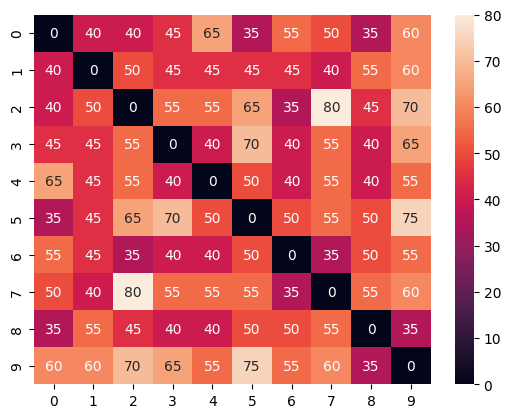

In [4]:
import seaborn as sns

sns.heatmap(similarity_matrix,annot=True);

In [5]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# converte matriz de similaridade em vetor spark
similarity_vector = [Vectors.dense(row) for row in similarity_matrix] 
print(similarity_vector)

#inicializa Spark 
spark = SparkSession.builder.appName("algumnome").getOrCreate()

# cria um dataframe com a matriz de similaridade
df = spark.createDataFrame([(v,) for v in similarity_vector], ["features"])

# utilização da biblioteca de clusterização Spark ML K-means com 3 seeds
bkmeans = BisectingKMeans().setK(3).setSeed(1)
model = bkmeans.fit(df)

# clusteriza cada linha do dataframe
cluster_assignments = model.transform(df).select("prediction").rdd.flatMap(lambda x: x).collect()

# resultado
for i, c in enumerate(cluster_assignments):
    print(f"Row {i+1} belongs to Cluster {c+1}")


[DenseVector([0.0, 40.0, 40.0, 45.0, 65.0, 35.0, 55.0, 50.0, 35.0, 60.0]), DenseVector([40.0, 0.0, 50.0, 45.0, 45.0, 45.0, 45.0, 40.0, 55.0, 60.0]), DenseVector([40.0, 50.0, 0.0, 55.0, 55.0, 65.0, 35.0, 80.0, 45.0, 70.0]), DenseVector([45.0, 45.0, 55.0, 0.0, 40.0, 70.0, 40.0, 55.0, 40.0, 65.0]), DenseVector([65.0, 45.0, 55.0, 40.0, 0.0, 50.0, 40.0, 55.0, 40.0, 55.0]), DenseVector([35.0, 45.0, 65.0, 70.0, 50.0, 0.0, 50.0, 55.0, 50.0, 75.0]), DenseVector([55.0, 45.0, 35.0, 40.0, 40.0, 50.0, 0.0, 35.0, 50.0, 55.0]), DenseVector([50.0, 40.0, 80.0, 55.0, 55.0, 55.0, 35.0, 0.0, 55.0, 60.0]), DenseVector([35.0, 55.0, 45.0, 40.0, 40.0, 50.0, 50.0, 55.0, 0.0, 35.0]), DenseVector([60.0, 60.0, 70.0, 65.0, 55.0, 75.0, 55.0, 60.0, 35.0, 0.0])]
Row 1 belongs to Cluster 3
Row 2 belongs to Cluster 1
Row 3 belongs to Cluster 3
Row 4 belongs to Cluster 2
Row 5 belongs to Cluster 2
Row 6 belongs to Cluster 3
Row 7 belongs to Cluster 1
Row 8 belongs to Cluster 2
Row 9 belongs to Cluster 3
Row 10 belongs t

In [6]:
# dicionario do cluster
clusters = {}
for i, c in enumerate(cluster_assignments):
    if c in clusters:
        clusters[c].append(i+1)
    else:
        clusters[c] = [i+1]

# display clusters
for c in clusters:
    print(f"Cluster {c+1}: {clusters[c]}")

Cluster 3: [1, 3, 6, 9, 10]
Cluster 1: [2, 7]
Cluster 2: [4, 5, 8]


In [7]:
import networkx as nx

# create graph
G = nx.Graph()
for c in range(max(cluster_assignments)+1):
    nodes = [i+1 for i, x in enumerate(cluster_assignments) if x == c]
    G.add_nodes_from(nodes)
    edges = [(n1, n2) for n1 in nodes for n2 in nodes if n1 < n2]
    G.add_edges_from(edges)

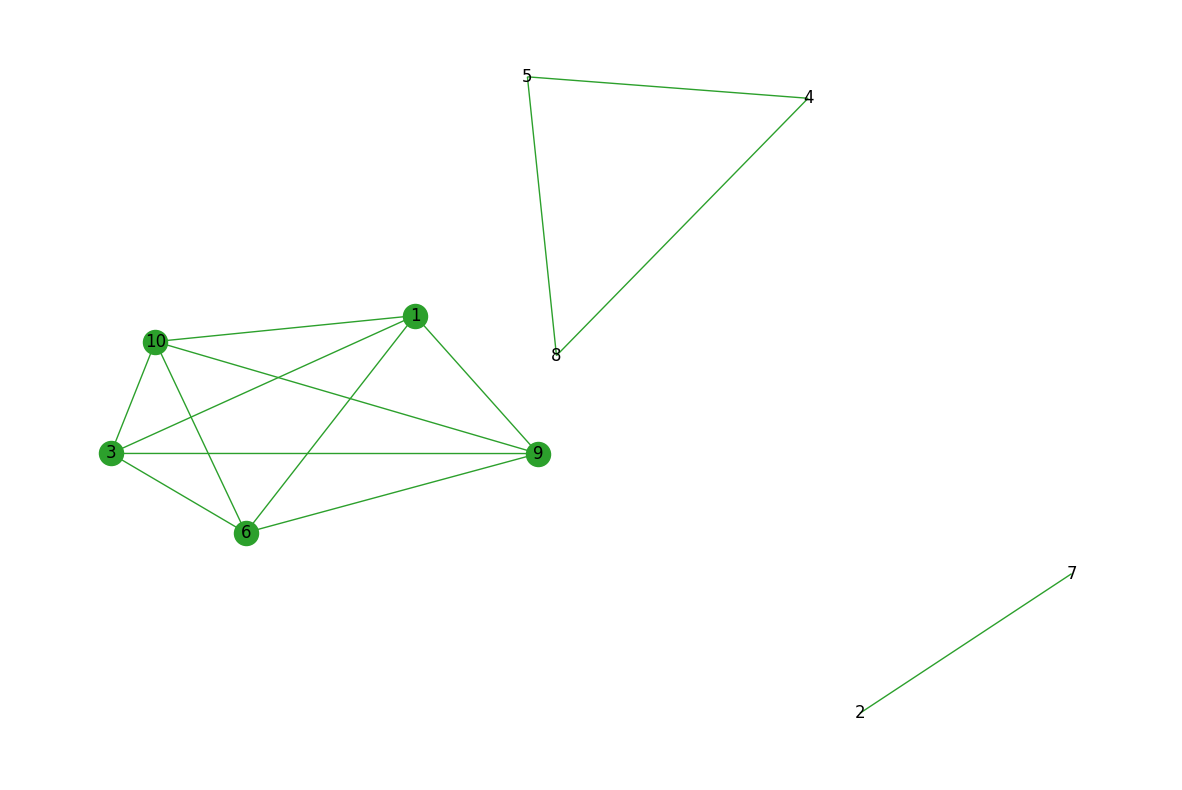

In [8]:
# draw graph
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10)) 
pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=f"C{c}")
nx.draw_networkx_edges(G, pos, edge_color=f"C{c}")
nx.draw_networkx_labels(G, pos, font_size=12, font_color='k')
plt.axis('off');

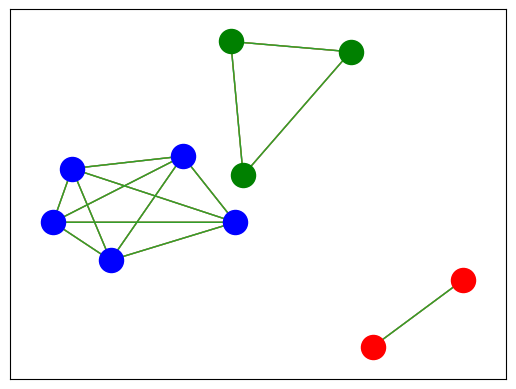

In [9]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # list of colors for each cluster
for c in range(max(cluster_assignments)+1):
    nodes = [i+1 for i, x in enumerate(cluster_assignments) if x == c]
    G.add_nodes_from(nodes)
    edges = [(n1, n2) for n1 in nodes for n2 in nodes if n1 < n2]
    G.add_edges_from(edges)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[c%len(colors)])
    nx.draw_networkx_edges(G, pos, edge_color=f"C{c}")

plt.show()